In [1]:
import pandas as pd
import numpy as np

In [ ]:
#Load combined dataset
combined_data = pd.read_csv("data/combined_stats.csv")
combined_data

,game_id,season,week,temp,wind,calendar_week,focus_team,focus_score,focus_temp_delta,did_win,avg_temp,attempts,carries,passing_epa,rushing_epa,conventional_plays_ran,pass_to_run_ratio
0,2015_01_PIT_NE,2015,1,65.0,7.0,37,NE,28,-1.093469,True,66.093469,32,24,15.961351,-0.252627,56,1.333333
1,2015_01_IND_BUF,2015,1,56.0,15.0,37,BUF,27,-9.687551,True,65.687551,19,36,9.972638,-2.539012,55,0.527778
2,2015_01_GB_CHI,2015,1,72.0,11.0,37,CHI,23,2.529143,False,69.470857,36,33,0.229273,7.547915,69,1.090909
3,2015_01_KC_HOU,2015,1,70.0,0.0,37,HOU,20,0.000000,False,70.000000,47,21,-6.469611,-4.144401,68,2.238095
4,2015_01_CAR_JAX,2015,1,77.0,7.0,37,JAX,9,-2.510000,False,79.510000,40,21,-15.522407,-0.896787,61,1.904762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4899,2024_18_KC_DEN,2024,18,28.0,5.0,1,KC,0,-1.048000,False,29.048000,17,11,-10.174690,-4.639490,28,1.545455
4900,2024_18_SEA_LA,2024,18,70.0,0.0,1,SEA,30,27.069714,True,42.930286,27,24,9.838861,2.883957,51,1.125000
4901,2024_18_LAC_LV,2024,18,70.0,0.0,1,LAC,34,0.000000,True,70.000000,36,35,17.740903,-0.007130,71,1.028571
4902,2024_18_MIA_NYJ,2024,18,34.0,10.0,1,MIA,20,-35.752527,False,69.752527,41,23,-6.921629,1.915941,64,1.782609


In [3]:
combined = combined_data.dropna(subset=["focus_temp_delta","avg_temp"]) # TODO dropping null rows (STL, OAK, and SD without data) for now 


combined["total_epa"] = combined["passing_epa"] + combined["rushing_epa"] # Adding Total EPA to analyze
combined

,game_id,season,week,temp,wind,calendar_week,focus_team,focus_score,focus_temp_delta,did_win,avg_temp,attempts,carries,passing_epa,rushing_epa,conventional_plays_ran,pass_to_run_ratio,total_epa
0,2015_01_PIT_NE,2015,1,65.0,7.0,37,NE,28,-1.093469,True,66.093469,32,24,15.961351,-0.252627,56,1.333333,15.708723
1,2015_01_IND_BUF,2015,1,56.0,15.0,37,BUF,27,-9.687551,True,65.687551,19,36,9.972638,-2.539012,55,0.527778,7.433625
2,2015_01_GB_CHI,2015,1,72.0,11.0,37,CHI,23,2.529143,False,69.470857,36,33,0.229273,7.547915,69,1.090909,7.777188
3,2015_01_KC_HOU,2015,1,70.0,0.0,37,HOU,20,0.000000,False,70.000000,47,21,-6.469611,-4.144401,68,2.238095,-10.614012
4,2015_01_CAR_JAX,2015,1,77.0,7.0,37,JAX,9,-2.510000,False,79.510000,40,21,-15.522407,-0.896787,61,1.904762,-16.419194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4899,2024_18_KC_DEN,2024,18,28.0,5.0,1,KC,0,-1.048000,False,29.048000,17,11,-10.174690,-4.639490,28,1.545455,-14.814180
4900,2024_18_SEA_LA,2024,18,70.0,0.0,1,SEA,30,27.069714,True,42.930286,27,24,9.838861,2.883957,51,1.125000,12.722818
4901,2024_18_LAC_LV,2024,18,70.0,0.0,1,LAC,34,0.000000,True,70.000000,36,35,17.740903,-0.007130,71,1.028571,17.733773
4902,2024_18_MIA_NYJ,2024,18,34.0,10.0,1,MIA,20,-35.752527,False,69.752527,41,23,-6.921629,1.915941,64,1.782609,-5.005688


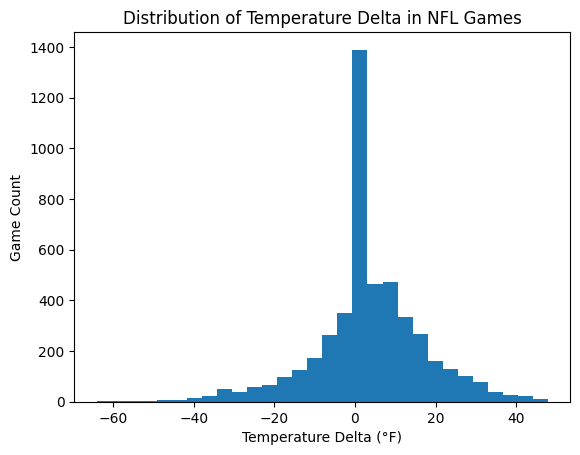

In [4]:
import matplotlib.pyplot as plt

#General plot visualizaing temperature delta distribution
plt.hist(combined["focus_temp_delta"], bins=30)
plt.xlabel("Temperature Delta (°F)")
plt.ylabel("Game Count")
plt.title("Distribution of Temperature Delta in NFL Games")
plt.show()

# Temp Delta vs Scoring

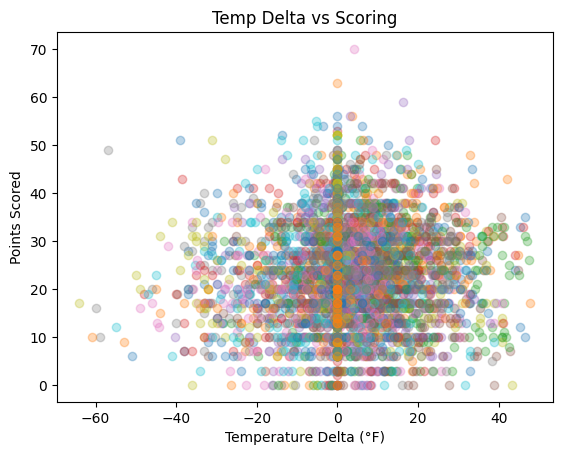

In [5]:
teams = combined["focus_team"].unique() # Team list

plt.figure()
for team in teams:
    tdf = combined[combined["focus_team"] == team]
    plt.scatter(tdf["focus_temp_delta"], tdf["focus_score"], alpha=0.3, label=team)

plt.xlabel("Temperature Delta (°F)")
plt.ylabel("Points Scored")
plt.title("Temp Delta vs Scoring")
plt.show()


Lets focus on two teams, to get a good picture of what may be going on with two teams

Green Bay Packers (GB) play in an open air stadium and typically face snow and intense wind. They are a good example of a team with extreme weather effects.

Dallas Cowboys (DAL) play in a closed stadium, therefore having negligble weather effects. They will be our example of a team with relatively small weather effects.

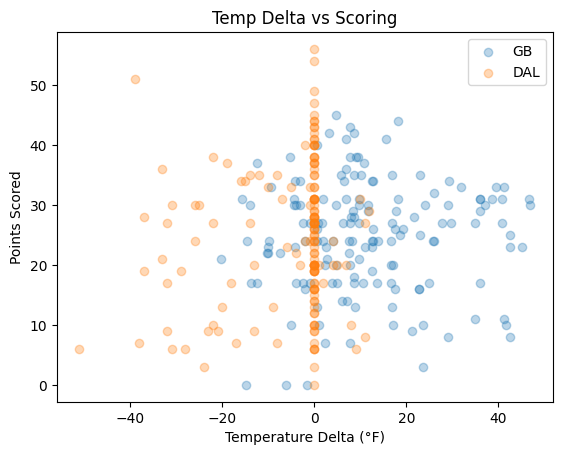

In [6]:
team_focus = ["GB", "DAL"] # Focusing on few teams

plt.figure()
for team in team_focus:
    tdf = combined[combined["focus_team"] == team]
    plt.scatter(tdf["focus_temp_delta"], tdf["focus_score"], alpha=0.3, label=team)

plt.xlabel("Temperature Delta (°F)")
plt.ylabel("Points Scored")
plt.title("Temp Delta vs Scoring")
plt.legend()
plt.show()

Green Bay Packers have a lot more experience playing in harsher climates compares to Dallas playing in a more stable controlled stadium environment. 

This would explain the trend seen in the scatter plot were at higher temp deltas Green Bay Packers were able to perform better (score more points) while being less impacted at negative temperature deltas.
Alternatively, Dallas Cowboys seem to struggle more at negative temperature deltas having a lot more data points with lower total points scored.

Overall, a harsher temperature climate seems to have impacted Dallas harsher than a team like Packers, following the idea that teams that train under harsher climates are more acclimated to that type of scenario.


We can bucket the different temperature deltas into bins to get a better picture of what the average score was of teams vs the average temp delta (bucketed)
To examine if there is an overall trend over the entire dataset of how teams performed compared to the temp delta

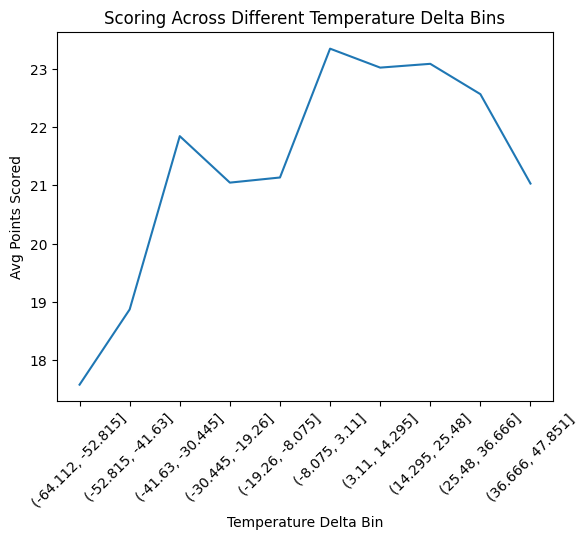

In [7]:
temp_bins = pd.cut(combined["focus_temp_delta"], bins=10)

points_by_temp = combined.groupby(temp_bins)["focus_score"].mean()

plt.plot(points_by_temp.index.astype(str), points_by_temp.values)
plt.xticks(rotation=45)
plt.xlabel("Temperature Delta Bin")
plt.ylabel("Avg Points Scored")
plt.title("Scoring Across Different Temperature Delta Bins")
plt.show()

As we can see there is a general positive correlation between temperature delta and points scored by the team.

As teams played in warmer weather compared to what they are used to they performed better offensively, scoring more points.

# Passing EPA vs Wind Buckets

What about another weather condition like the wind? How did this impact play calls and performance?

In windy conditions it would be expected to hinder teams passing performance, is this true?

In [8]:
# Get unique wind values to create buckets
wind_unique = np.sort(combined["wind"].dropna().unique())

# Three buckets for wind: low, medium and high wind
wind_tertiles = np.quantile(wind_unique, [0.33, 0.66])
print("Wind tertiles:")
print(wind_tertiles)

# Create wind buckets
combined_wind = combined.copy()
combined_wind["wind_bucket"] = pd.cut(
    combined["wind"],
    bins=[-np.inf, wind_tertiles[0], wind_tertiles[1], np.inf],
    labels=["Low Wind", "Moderate Wind", "High Wind"]
)

combined_wind.head() 


Wind tertiles:
[10.23 20.46]


,game_id,season,week,temp,wind,calendar_week,focus_team,focus_score,focus_temp_delta,did_win,avg_temp,attempts,carries,passing_epa,rushing_epa,conventional_plays_ran,pass_to_run_ratio,total_epa,wind_bucket
0,2015_01_PIT_NE,2015,1,65.0,7.0,37,NE,28,-1.093469,True,66.093469,32,24,15.961351,-0.252627,56,1.333333,15.708723,Low Wind
1,2015_01_IND_BUF,2015,1,56.0,15.0,37,BUF,27,-9.687551,True,65.687551,19,36,9.972638,-2.539012,55,0.527778,7.433625,Moderate Wind
2,2015_01_GB_CHI,2015,1,72.0,11.0,37,CHI,23,2.529143,False,69.470857,36,33,0.229273,7.547915,69,1.090909,7.777188,Moderate Wind
3,2015_01_KC_HOU,2015,1,70.0,0.0,37,HOU,20,0.000000,False,70.000000,47,21,-6.469611,-4.144401,68,2.238095,-10.614012,Low Wind
4,2015_01_CAR_JAX,2015,1,77.0,7.0,37,JAX,9,-2.510000,False,79.510000,40,21,-15.522407,-0.896787,61,1.904762,-16.419194,Low Wind


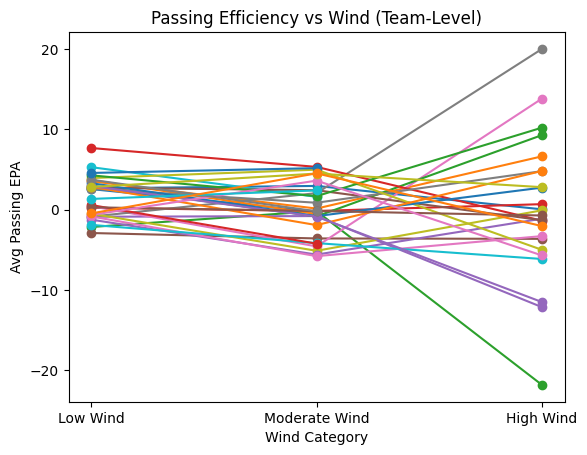

In [9]:
epa_by_wind = combined_wind.groupby(["focus_team", "wind_bucket"])[
    ["passing_epa", "rushing_epa"]
].mean().reset_index()

for team in teams:
    team_df = epa_by_wind[epa_by_wind["focus_team"] == team]
    plt.plot(team_df["wind_bucket"], team_df["passing_epa"], marker="o")

plt.xlabel("Wind Category")
plt.ylabel("Avg Passing EPA")
plt.title("Passing Efficiency vs Wind (Team-Level)")
plt.show()

Once again lets focus on some focus teams.

The same Packers and Cowboys as before but now adding the San Francisco 49ers.

San Fran 49ers (SF) play in an open air stadium with more milder conditions, some wind, but no extreme snow or cold like Packers. They can be an example of a team with medium weather effects.


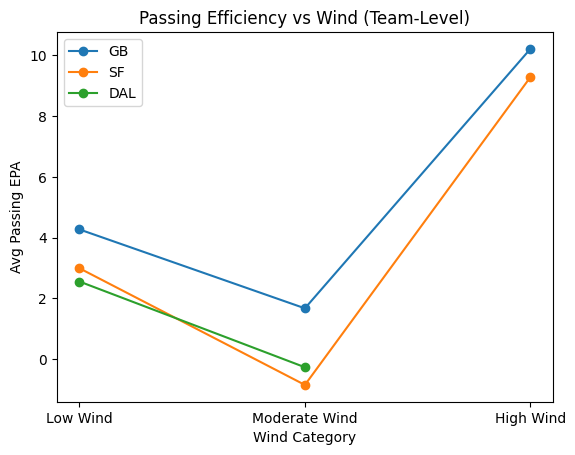

In [10]:
epa_by_wind = combined_wind.groupby(["focus_team", "wind_bucket"])[
    ["passing_epa", "rushing_epa"]
].mean().reset_index()

team_focus = ["GB","SF","DAL"] # Focusing on few teams

for team in team_focus:
    team_df = epa_by_wind[epa_by_wind["focus_team"] == team]
    plt.plot(team_df["wind_bucket"], team_df["passing_epa"], marker="o", label=team)

plt.xlabel("Wind Category")
plt.ylabel("Avg Passing EPA")
plt.title("Passing Efficiency vs Wind (Team-Level)")
plt.legend()
plt.show()

We have some interesting results... 

The Low wind bucket seems to have a higher passing EPA than the moderate wind bucket, which is expected, higher wind can hinder passing capability in football.

However the graph show large spike in passing EPA for high wind. Why is this the case? If wind to hinder passing ability than the passing EPA should be lowerfor the high wind bucket.

Lets check these records as to why this may be happening.

In [11]:
wind_games_focused = combined_wind[combined_wind["focus_team"].isin(team_focus)] #focusing on our example teams
wind_games_focused = wind_games_focused.groupby(["focus_team", "wind_bucket"]).size().reset_index(name='count')

wind_games_focused

,focus_team,wind_bucket,count
0,DAL,Low Wind,141
1,DAL,Moderate Wind,15
2,GB,Low Wind,113
3,GB,Moderate Wind,34
4,GB,High Wind,5
5,SF,Low Wind,120
6,SF,Moderate Wind,30
7,SF,High Wind,2


As we can see, for SF for example there is only 2 High Wind games compared to the 120 Low Wind and 30 Moderate Wind games.

This can explain our unusual results that there is a spike in Passing EPA for high wind games as our sample size is too low to properly exemplify a trend.

The Law of Small Numbers ! :)





Lets try analyzing this another way 
Lets recreate this distribution with the entire dataset but only evaluating the (focus_team & wind_Bucket) buckets with a reliable amount of data.

In [12]:
wind_counts_full = combined_wind.groupby(["focus_team", "wind_bucket"]).size().reset_index(name="n_games").sort_values("n_games")

wind_counts_full

,focus_team,wind_bucket,n_games
13,CAR,High Wind,1
16,CHI,High Wind,1
30,DET,High Wind,1
60,NE,High Wind,1
54,MIA,High Wind,1
...,...,...,...
0,ARI,Low Wind,138
55,MIN,Low Wind,140
28,DET,Low Wind,140
23,DAL,Low Wind,141


In [13]:
MIN_N = 11 # Minimum number of games to consider a wind bucket reliable for a team
wind_counts_full["reliable"] = wind_counts_full["n_games"] >= MIN_N

#merge counts back with original dataset and filter to only reliable data
combined_reliable = combined_wind.merge(
    wind_counts_full[["focus_team", "wind_bucket", "reliable"]],
    on=["focus_team", "wind_bucket"],
    how="left"
)
combined_reliable = combined_reliable[combined_reliable["reliable"]]

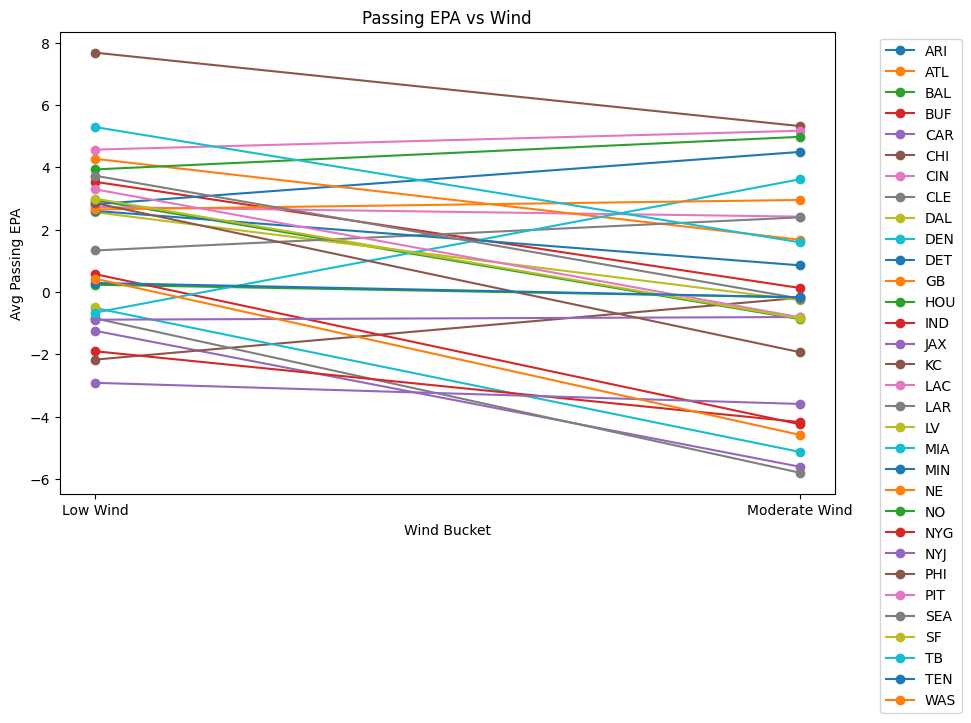

In [14]:
epa_by_wind = combined_reliable.groupby(["focus_team", "wind_bucket"])["passing_epa"].mean().reset_index()

teams = epa_by_wind["focus_team"].unique()

plt.figure(figsize=(10,6))
for team in teams:
    team_df = epa_by_wind[epa_by_wind["focus_team"] == team]
    plt.plot(team_df["wind_bucket"], team_df["passing_epa"], marker="o", label=team)

plt.xlabel("Wind Bucket")
plt.ylabel("Avg Passing EPA")
plt.title("Passing EPA vs Wind")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

After removing the focus_team & wind_bucket buckets with too low of a sample size (labeled unreliable in our dataset),

We can see that overall there is a general negative correlation between wind and pass EPA.


With higher wind speeds, generally less the passing EPA.

If there were more games with high wind speeds recorded, we would expect to see a similar trend that at high wind, passing EPA is even lower. However, in our time frame for data collected there aren't enough samples of games with high wind to observe the trend.

# Cold/Warm Teams vs Pass to Run Ratio

Do teams who practice in warmer climates and experience harsher colder temperatures in games (negative temp deltas) have a lower pass to run ratio compared to teams who face the opposite?

A team like the Packers who we were looking at before, practice in colder climates and generally face more positive temp delts, are more accustomed to the cold weather. I would think that in these games where climates are generally warmer and less harsh, they tend to be more comfortable passing the ball.

Compared to the team like Dallas with a controlled and warmer climate at home, that face harsher and colder weather in their away season games (negative temp delta), it would be expected they are less comfortable passing the ball,therefore having a lower pass/run ratio.

Is this trend what we see?

In [15]:
# Classify teams by climate exposure

#calculate mean temp deltas for each team
team_climate = (
    combined
    .groupby("focus_team")["focus_temp_delta"]
    .mean()
    .reset_index(name="mean_temp_delta")
)


#classify teams based on climate acclimation
# ex: BUF as a cold acclimated team, and DAL as a warm acclimated team, middle 33% as medium acclimated teams
q_team = team_climate["mean_temp_delta"].quantile([0.25, 0.75]).values
def climate_group(x):
    if x <= q_team[0]:
        return "Warm Accustomed Teams"
    elif x >= q_team[1]:
        return "Cold Accustomed Teams"
    else:
        return "Moderate Accustomed Teams"
team_climate["climate_group"] = team_climate["mean_temp_delta"].apply(climate_group)

combined_climate_teams = combined.merge(
    team_climate[["focus_team","climate_group"]],
    on="focus_team", how="left"
)

team_climate.sort_values("mean_temp_delta")

,focus_team,mean_temp_delta,climate_group
19,MIA,-6.592650,Warm Accustomed Teams
20,MIN,-6.101266,Warm Accustomed Teams
8,DAL,-5.435897,Warm Accustomed Teams
10,DET,-5.232704,Warm Accustomed Teams
0,ARI,-3.893333,Warm Accustomed Teams
17,LAR,-3.650350,Warm Accustomed Teams
1,ATL,-3.450704,Warm Accustomed Teams
12,HOU,-3.231788,Warm Accustomed Teams
18,LV,-3.150000,Moderate Accustomed Teams
22,NO,-2.830189,Moderate Accustomed Teams


In [16]:
# getting quantiles for temp delta to create temp buckets

#calculating temp quartiles for temp buckets
q = combined_climate_teams["focus_temp_delta"].quantile([0.25, 0.50, 0.75]).values

def temp_bucket_q(x):
    if x <= q[0]:
        return "Very Cold"
    elif x <= q[1]:
        return "Cold"
    elif x <= q[2]:
        return "Fair"
    else:
        return "Hot"

#creating temp buckets based on quartiles
combined_climate_teams["temp_bucket"] = combined_climate_teams["focus_temp_delta"].apply(temp_bucket_q)

#applying implicit ordering to temp buckets for analysis purposes
bucket_order = ["Very Cold","Cold","Fair","Hot"]
combined_climate_teams["temp_bucket"] = pd.Categorical(
    combined_climate_teams["temp_bucket"], categories=bucket_order, ordered=True
)

combined_climate_teams


,game_id,season,week,temp,wind,calendar_week,focus_team,focus_score,focus_temp_delta,did_win,avg_temp,attempts,carries,passing_epa,rushing_epa,conventional_plays_ran,pass_to_run_ratio,total_epa,climate_group,temp_bucket
0,2015_01_PIT_NE,2015,1,65.0,7.0,37,NE,28,-1.093469,True,66.093469,32,24,15.961351,-0.252627,56,1.333333,15.708723,Cold Accustomed Teams,Cold
1,2015_01_IND_BUF,2015,1,56.0,15.0,37,BUF,27,-9.687551,True,65.687551,19,36,9.972638,-2.539012,55,0.527778,7.433625,Moderate Accustomed Teams,Very Cold
2,2015_01_GB_CHI,2015,1,72.0,11.0,37,CHI,23,2.529143,False,69.470857,36,33,0.229273,7.547915,69,1.090909,7.777188,Cold Accustomed Teams,Fair
3,2015_01_KC_HOU,2015,1,70.0,0.0,37,HOU,20,0.000000,False,70.000000,47,21,-6.469611,-4.144401,68,2.238095,-10.614012,Warm Accustomed Teams,Cold
4,2015_01_CAR_JAX,2015,1,77.0,7.0,37,JAX,9,-2.510000,False,79.510000,40,21,-15.522407,-0.896787,61,1.904762,-16.419194,Moderate Accustomed Teams,Very Cold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4771,2024_18_KC_DEN,2024,18,28.0,5.0,1,KC,0,-1.048000,False,29.048000,17,11,-10.174690,-4.639490,28,1.545455,-14.814180,Cold Accustomed Teams,Cold
4772,2024_18_SEA_LA,2024,18,70.0,0.0,1,SEA,30,27.069714,True,42.930286,27,24,9.838861,2.883957,51,1.125000,12.722818,Cold Accustomed Teams,Hot
4773,2024_18_LAC_LV,2024,18,70.0,0.0,1,LAC,34,0.000000,True,70.000000,36,35,17.740903,-0.007130,71,1.028571,17.733773,Moderate Accustomed Teams,Cold
4774,2024_18_MIA_NYJ,2024,18,34.0,10.0,1,MIA,20,-35.752527,False,69.752527,41,23,-6.921629,1.915941,64,1.782609,-5.005688,Warm Accustomed Teams,Very Cold


In [17]:
# combined_reliable --> df with reliable wind bucket games, so adding on this to have wind and temp buckets both for analysis

focus_df = (
    combined_climate_teams
    .merge(
        combined_reliable[["game_id","focus_team","wind_bucket"]],
        on=["game_id","focus_team"],
        how="inner"   # keeps only reliable wind rows
    )
)

focus_df

,game_id,season,week,temp,wind,calendar_week,focus_team,focus_score,focus_temp_delta,did_win,...,attempts,carries,passing_epa,rushing_epa,conventional_plays_ran,pass_to_run_ratio,total_epa,climate_group,temp_bucket,wind_bucket
0,2015_01_PIT_NE,2015,1,65.0,7.0,37,NE,28,-1.093469,True,...,32,24,15.961351,-0.252627,56,1.333333,15.708723,Cold Accustomed Teams,Cold,Low Wind
1,2015_01_IND_BUF,2015,1,56.0,15.0,37,BUF,27,-9.687551,True,...,19,36,9.972638,-2.539012,55,0.527778,7.433625,Moderate Accustomed Teams,Very Cold,Moderate Wind
2,2015_01_GB_CHI,2015,1,72.0,11.0,37,CHI,23,2.529143,False,...,36,33,0.229273,7.547915,69,1.090909,7.777188,Cold Accustomed Teams,Fair,Moderate Wind
3,2015_01_KC_HOU,2015,1,70.0,0.0,37,HOU,20,0.000000,False,...,47,21,-6.469611,-4.144401,68,2.238095,-10.614012,Warm Accustomed Teams,Cold,Low Wind
4,2015_01_CAR_JAX,2015,1,77.0,7.0,37,JAX,9,-2.510000,False,...,40,21,-15.522407,-0.896787,61,1.904762,-16.419194,Moderate Accustomed Teams,Very Cold,Low Wind
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4680,2024_18_KC_DEN,2024,18,28.0,5.0,1,KC,0,-1.048000,False,...,17,11,-10.174690,-4.639490,28,1.545455,-14.814180,Cold Accustomed Teams,Cold,Low Wind
4681,2024_18_SEA_LA,2024,18,70.0,0.0,1,SEA,30,27.069714,True,...,27,24,9.838861,2.883957,51,1.125000,12.722818,Cold Accustomed Teams,Hot,Low Wind
4682,2024_18_LAC_LV,2024,18,70.0,0.0,1,LAC,34,0.000000,True,...,36,35,17.740903,-0.007130,71,1.028571,17.733773,Moderate Accustomed Teams,Cold,Low Wind
4683,2024_18_MIA_NYJ,2024,18,34.0,10.0,1,MIA,20,-35.752527,False,...,41,23,-6.921629,1.915941,64,1.782609,-5.005688,Warm Accustomed Teams,Very Cold,Low Wind


In [18]:
#aggregating data and then calcing run/pass ratio 
stack = (
    focus_df
    .groupby(["climate_group","temp_bucket"])[["attempts","carries"]]
    .sum()
    .reset_index()
)

stack["pass_run_ratio"] = stack["attempts"] / stack["carries"]

stack

,climate_group,temp_bucket,attempts,carries,pass_run_ratio
0,Cold Accustomed Teams,Very Cold,8039,6261,1.283980
1,Cold Accustomed Teams,Cold,2493,2081,1.197982
2,Cold Accustomed Teams,Fair,12384,10017,1.236298
3,Cold Accustomed Teams,Hot,18041,14048,1.284240
4,Moderate Accustomed Teams,Very Cold,19615,15519,1.263935
5,Moderate Accustomed Teams,Cold,15932,12068,1.320186
6,Moderate Accustomed Teams,Fair,22758,17336,1.312760
7,Moderate Accustomed Teams,Hot,20605,16105,1.279416
8,Warm Accustomed Teams,Very Cold,12100,9039,1.338644
9,Warm Accustomed Teams,Cold,23004,17420,1.320551


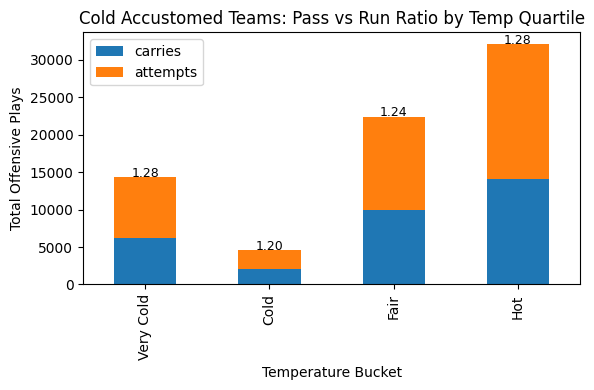

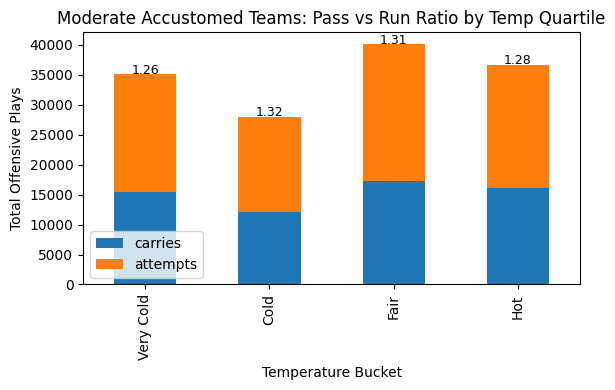

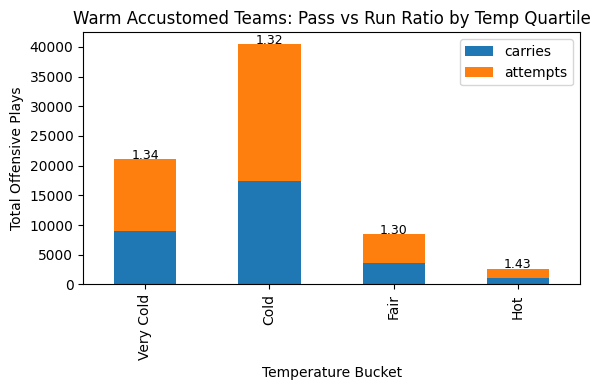

In [19]:
for g in ["Cold Accustomed Teams","Moderate Accustomed Teams","Warm Accustomed Teams"]:
    df = (
        stack[stack["climate_group"] == g]
        .sort_values("temp_bucket")
        .set_index("temp_bucket")
    )

    ax = df[["carries","attempts"]].plot(
        kind="bar",
        stacked=True,
        figsize=(6,4)
    )

    for i, r in enumerate(df["pass_run_ratio"]):
        total = df.iloc[i][["carries","attempts"]].sum()
        ax.text(i, total + 50, f"{r:.2f}", ha="center", fontsize=9)

    ax.set_title(f"{g}: Pass vs Run Ratio by Temp Quartile")
    ax.set_ylabel("Total Offensive Plays")
    ax.set_xlabel("Temperature Bucket")
    plt.tight_layout()
    plt.show()

There are few things we can takeaway from this visualization

First is that overall across the different temperature buckets, there isnt any clear trend in passing vs rushing attempts, that overall strategy stays relatively the same or is affected more by other variables for other temperatures

Regarding the initial question, we can see for Cold Climate accustomed teams, their Pass to run ratio hovers around low to mid 1.2s,
Moderate Climate Accustomed teams pass to run ratio hover around mid 1.2s to low 1.3s,
and Warm accustomed teams pass to run ratio hover around low to mid 1.3s

This tells us that contrary to inital claim, warmer accustomed teams have higher pass to run ratio. That teams more accustomed to colder harsher climates tend to overall lean towards running the ball more than teams more accustomed to warmer and moderate climates.

Further analysis can be conducted but this can maybe be due to the teams in colder harsher climates being more comfortable practicing rushing in these environments rather than passing!